# Backtesting Investment Strategies (US Stocks)

## Importing the Data

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv("dji.csv", parse_dates = ["Date"], index_col = "Date")

In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,12459.540039,12580.349609,12404.820312,12474.519531,12474.519531,327200000
2007-01-04,12473.160156,12510.410156,12403.860352,12480.690430,12480.690430,259060000
2007-01-05,12480.049805,12480.129883,12365.410156,12398.009766,12398.009766,235220000
2007-01-08,12392.009766,12445.919922,12337.370117,12423.490234,12423.490234,223500000
2007-01-09,12424.769531,12466.429688,12369.169922,12416.599609,12416.599609,225190000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3859 entries, 2007-01-03 to 2022-04-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3859 non-null   float64
 1   High       3859 non-null   float64
 2   Low        3859 non-null   float64
 3   Close      3859 non-null   float64
 4   Adj Close  3859 non-null   float64
 5   Volume     3859 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 211.0 KB


Extracting a dataframe that contains closing prices after the financial crisis of 2008-09.

In [6]:
df = data.loc["2010-01-01": "2022-04-30", "Close"].to_frame()

In [7]:
df

,Close
Date,
2010-01-04,10583.959961
2010-01-05,10572.019531
2010-01-06,10573.679688
2010-01-07,10606.860352
2010-01-08,10618.190430
...,...
2022-04-25,34049.460938
2022-04-26,33240.179688
2022-04-27,33301.929688


## Data Visualization & Returns

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use("seaborn")

In [9]:
df.describe()

,Close
count,3103.000000
mean,20148.328417
std,7239.013371
min,9686.480469
25%,13898.055176
50%,17946.679688
75%,25671.390625
max,36799.648438


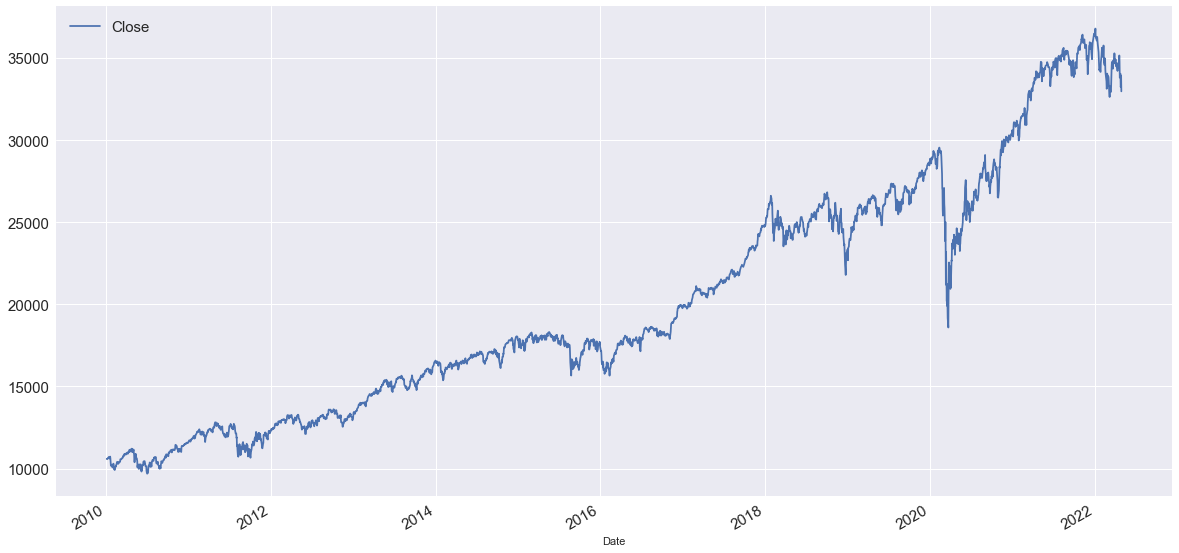

In [11]:
df.plot(figsize = (20, 10), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [12]:
df["Return"] = df.pct_change()

In [13]:
df.dropna(inplace = True)

In [14]:
df

,Close,Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2022-04-25,34049.460938,0.007041
2022-04-26,33240.179688,-0.023768
2022-04-27,33301.929688,0.001858


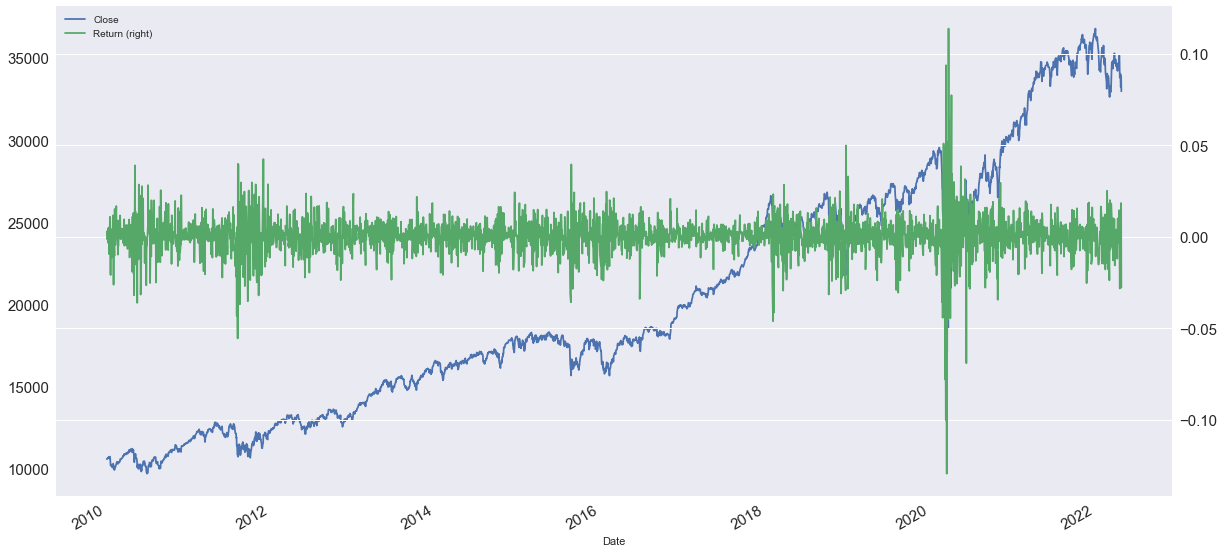

In [16]:
df.plot(figsize = (20, 10), secondary_y = "Return", mark_right = True, fontsize = 15)
plt.show()

In [17]:
df.rename(columns = {"Close":"DJI_Close", "Return":"DJI_Return"}, inplace = True)

In [18]:
df

,DJI_Close,DJI_Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2022-04-25,34049.460938,0.007041
2022-04-26,33240.179688,-0.023768
2022-04-27,33301.929688,0.001858


## Backtesting a simple Momentum Strategy

__Positions__:

+1: Investing in DJI (__long__ position) <br>
-1: Short Selling DJI (__short__ position)<br>
0: No position (__neutral__)

__Strategies__:

-__Buy and Hold__ (Basic Strategy - passive): Initially Investing into DJI and do nothing (Position: +1 on any given day)

-__Simple Momentum__ (active Strategy to be tested): <br>
__a) Investing (+1)__ into DJI tomorrow if today´s return was __positive__ <br>
__b) Short selling (-1)__ DJI tomorrow if today´s return was __negative__

In [19]:
df["Position"] = np.sign(df["DJI_Return"])

In [20]:
df

,DJI_Close,DJI_Return,Position
Date,,,
2010-01-05,10572.019531,-0.001128,-1.0
2010-01-06,10573.679688,0.000157,1.0
2010-01-07,10606.860352,0.003138,1.0
2010-01-08,10618.190430,0.001068,1.0
2010-01-11,10663.990234,0.004313,1.0
...,...,...,...
2022-04-25,34049.460938,0.007041,1.0
2022-04-26,33240.179688,-0.023768,-1.0
2022-04-27,33301.929688,0.001858,1.0


In [21]:
df["Strategy_Ret"] = df["Position"].shift() * df["DJI_Return"]

In [22]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret
Date,,,,
2010-01-05,10572.019531,-0.001128,-1.0,NaN
2010-01-06,10573.679688,0.000157,1.0,-0.000157
2010-01-07,10606.860352,0.003138,1.0,0.003138
2010-01-08,10618.190430,0.001068,1.0,0.001068
2010-01-11,10663.990234,0.004313,1.0,0.004313
...,...,...,...,...
2022-04-25,34049.460938,0.007041,1.0,-0.007041
2022-04-26,33240.179688,-0.023768,-1.0,-0.023768
2022-04-27,33301.929688,0.001858,1.0,-0.001858


In [24]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0, 0]

In [25]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,-1.0,NaN,10572.019531
2010-01-06,10573.679688,0.000157,1.0,-0.000157,10570.359375
2010-01-07,10606.860352,0.003138,1.0,0.003138,10603.529620
2010-01-08,10618.190430,0.001068,1.0,0.001068,10614.856140
2010-01-11,10663.990234,0.004313,1.0,0.004313,10660.641563
...,...,...,...,...,...
2022-04-25,34049.460938,0.007041,1.0,-0.007041,5679.320310
2022-04-26,33240.179688,-0.023768,-1.0,-0.023768,5544.335282
2022-04-27,33301.929688,0.001858,1.0,-0.001858,5534.035618


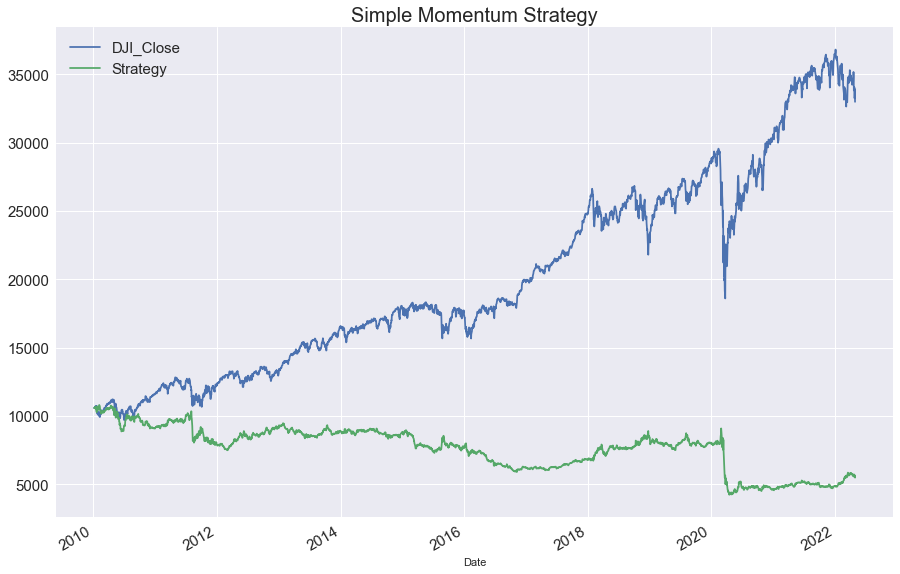

In [26]:
df[["DJI_Close", "Strategy"]].plot(figsize = (15, 10), fontsize = 15)
plt.title("Simple Momentum Strategy", fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

The below function calculates annualized risk and return:

In [27]:
def summary_ann(returns):
    summary = returns.agg(["mean", "std"]).T
    summary["Return"] = summary["mean"] * 252
    summary["Risk"] = summary["std"] * np.sqrt(252)
    summary.drop(columns = ["mean", "std"], inplace = True)
    return summary

In [28]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return,Risk
DJI_Return,0.106961,0.170593
Strategy_Ret,-0.038700,0.170709


The risk is similar but the returns from the strategy is far worse.

**We can conclude that the Simple Momentum Strategy under-performs compared to the Buy and Hold strategy in this case.**

## Backtesting a simple Contrarian Strategy

__Strategies__:

-__Buy and Hold__ (Basic Strategy): Initially Investing into DJI and do nothing (Position: +1 on all days)

-__Simple Contrarian__ (Strategy to be tested): <br>
__a) Short Selling (-1)__ DJI tomorrow if today´s return was __positive__ <br>
__b) Investing (+1)__ into DJI tomorrow if today´s return was __negative__

In [30]:
df = data.loc["2010":, "Close"].to_frame()
df["DJI_Return"] = df.Close.pct_change()
df.columns = ["DJI_Close", "DJI_Return"]
df.dropna(inplace = True)
df

,DJI_Close,DJI_Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2022-04-25,34049.460938,0.007041
2022-04-26,33240.179688,-0.023768
2022-04-27,33301.929688,0.001858


Using a minus sign to negate the returns:

In [31]:
df["Position"] = -np.sign(df["DJI_Return"])

In [32]:
df.head()

,DJI_Close,DJI_Return,Position
Date,,,
2010-01-05,10572.019531,-0.001128,1.0
2010-01-06,10573.679688,0.000157,-1.0
2010-01-07,10606.860352,0.003138,-1.0
2010-01-08,10618.190430,0.001068,-1.0
2010-01-11,10663.990234,0.004313,-1.0


In [33]:
df["Strategy_Ret"] = df["Position"].shift() * df["DJI_Return"]

In [34]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret
Date,,,,
2010-01-05,10572.019531,-0.001128,1.0,NaN
2010-01-06,10573.679688,0.000157,-1.0,0.000157
2010-01-07,10606.860352,0.003138,-1.0,-0.003138
2010-01-08,10618.190430,0.001068,-1.0,-0.001068
2010-01-11,10663.990234,0.004313,-1.0,-0.004313
...,...,...,...,...
2022-04-25,34049.460938,0.007041,-1.0,0.007041
2022-04-26,33240.179688,-0.023768,1.0,0.023768
2022-04-27,33301.929688,0.001858,-1.0,0.001858


In [35]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0, 0]

In [36]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,1.0,NaN,10572.019531
2010-01-06,10573.679688,0.000157,-1.0,0.000157,10573.679688
2010-01-07,10606.860352,0.003138,-1.0,-0.003138,10540.499023
2010-01-08,10618.190430,0.001068,-1.0,-0.001068,10529.239831
2010-01-11,10663.990234,0.004313,-1.0,-0.004313,10483.823700
...,...,...,...,...,...
2022-04-25,34049.460938,0.007041,-1.0,0.007041,13766.408340
2022-04-26,33240.179688,-0.023768,1.0,0.023768,14093.605771
2022-04-27,33301.929688,0.001858,-1.0,0.001858,14119.787343


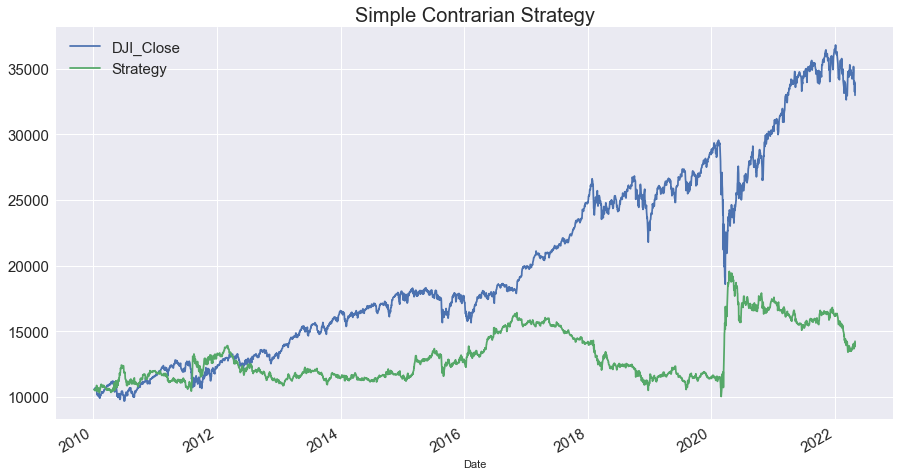

In [38]:
df[["DJI_Close", "Strategy"]].plot(figsize = (15, 8), fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Simple Contrarian Strategy", fontsize = 20)
plt.show()

In [39]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return,Risk
DJI_Return,0.106961,0.170593
Strategy_Ret,0.038700,0.170709


**Again, we conclude that in the longer term, Buy and Hold strategy outperforms simple Contrarian strategy.**

## More complex Strategies & Backtesting vs. Fitting

**Now we will try to tweak our strategy to give better results while backtesting. In short, fitting.**

In [40]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,12459.540039,12580.349609,12404.820312,12474.519531,12474.519531,327200000
2007-01-04,12473.160156,12510.410156,12403.860352,12480.690430,12480.690430,259060000
2007-01-05,12480.049805,12480.129883,12365.410156,12398.009766,12398.009766,235220000
2007-01-08,12392.009766,12445.919922,12337.370117,12423.490234,12423.490234,223500000
2007-01-09,12424.769531,12466.429688,12369.169922,12416.599609,12416.599609,225190000
...,...,...,...,...,...,...
2022-04-25,33731.648438,34106.011719,33323.371094,34049.460938,34049.460938,416900000
2022-04-26,33907.488281,33909.511719,33230.949219,33240.179688,33240.179688,400020000
2022-04-27,33450.921875,33697.179688,33108.890625,33301.929688,33301.929688,447230000


In [41]:
df = data.loc["2010":, "Close"].to_frame()
df["DJI_Return"] = df.Close.pct_change()
df.columns = ["DJI_Close", "DJI_Return"]
df.dropna(inplace = True)
df.head()

,DJI_Close,DJI_Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313


In [42]:
df["Position"] = np.where(df["DJI_Return"] > 0.01, -1, 1)
df.head()

,DJI_Close,DJI_Return,Position
Date,,,
2010-01-05,10572.019531,-0.001128,1
2010-01-06,10573.679688,0.000157,1
2010-01-07,10606.860352,0.003138,1
2010-01-08,10618.190430,0.001068,1
2010-01-11,10663.990234,0.004313,1


In [43]:
df["Strategy_Ret"] = df["Position"].shift() * df["DJI_Return"]
df.head()

,DJI_Close,DJI_Return,Position,Strategy_Ret
Date,,,,
2010-01-05,10572.019531,-0.001128,1,NaN
2010-01-06,10573.679688,0.000157,1,0.000157
2010-01-07,10606.860352,0.003138,1,0.003138
2010-01-08,10618.190430,0.001068,1,0.001068
2010-01-11,10663.990234,0.004313,1,0.004313


In [44]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0, 0]
df.head()

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,1,NaN,10572.019531
2010-01-06,10573.679688,0.000157,1,0.000157,10573.679688
2010-01-07,10606.860352,0.003138,1,0.003138,10606.860352
2010-01-08,10618.190430,0.001068,1,0.001068,10618.190430
2010-01-11,10663.990234,0.004313,1,0.004313,10663.990234


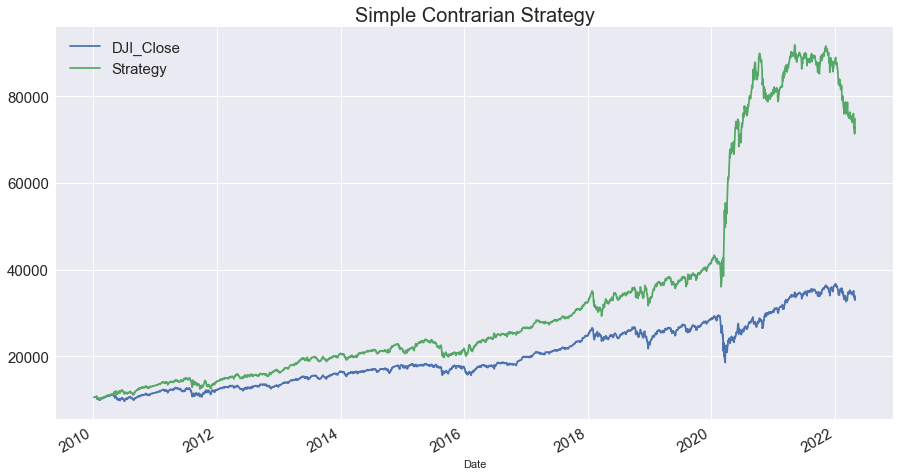

In [46]:
df[["DJI_Close", "Strategy"]].plot(figsize = (15, 8), fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Simple Contrarian Strategy", fontsize = 20)
plt.show()

In [47]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return,Risk
DJI_Return,0.106961,0.170593
Strategy_Ret,0.173517,0.170403


Even if a Strategy __seems to outperform__ the basic Strategy, the following issues need to be considered/analyzed as well: <br>
- Backtesting vs. Fitting -> Was the Strategy __fitted__ and optimized on __historical data__? __Forward Testing__ is required!<br>
- __Transaction Costs__ -> Changing Positions trigger Cost. Include Costs!<br>
- __Tax effects__ -> Changing Positions can trigger (earlier) Tax Payments. Include Taxes!

## Creating Simple Moving Averages (SMA)

In [48]:
df = data.loc["2010":, "Close"].to_frame()
df["DJI_Return"] = df.Close.pct_change()
df.columns = ["DJI_Close", "DJI_Return"]
df.dropna(inplace = True)

In [50]:
df["SMA50"] = df.DJI_Close.rolling(window = 50).mean()

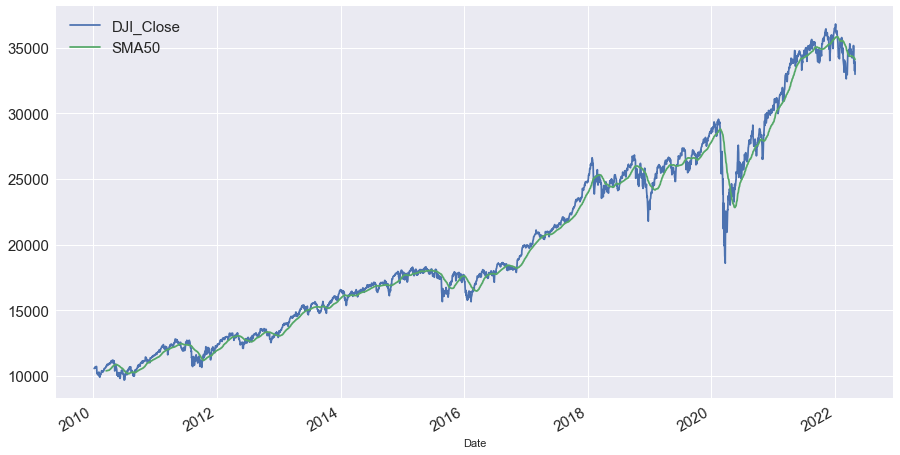

In [51]:
df[["DJI_Close", "SMA50"]].plot(figsize = (15, 8), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [52]:
df["SMA200"] = df.DJI_Close.rolling(window = 200).mean()

In [53]:
df.head()

,DJI_Close,DJI_Return,SMA50,SMA200
Date,,,,
2010-01-05,10572.019531,-0.001128,NaN,NaN
2010-01-06,10573.679688,0.000157,NaN,NaN
2010-01-07,10606.860352,0.003138,NaN,NaN
2010-01-08,10618.190430,0.001068,NaN,NaN
2010-01-11,10663.990234,0.004313,NaN,NaN


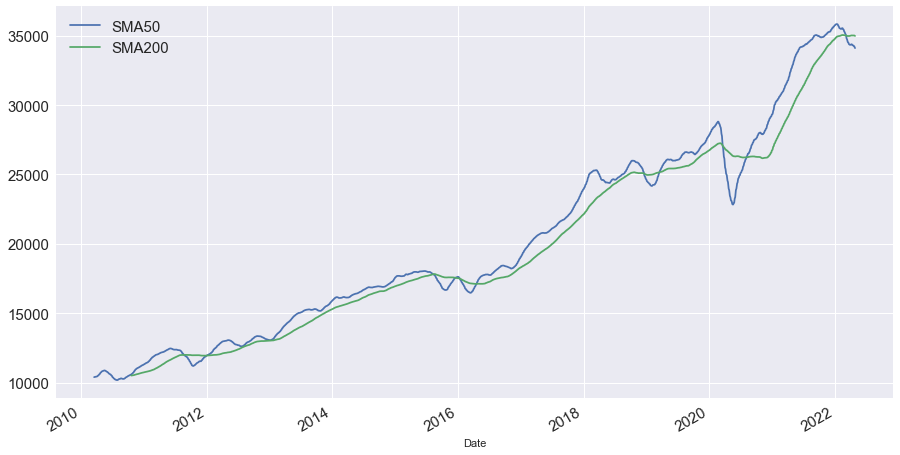

In [55]:
df[["SMA50", "SMA200"]].plot(figsize = (15, 8), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [56]:
df.dropna(inplace= True)

## Applying SMA strategies

__Strategies__:

-__Buy and Hold__ (Basic Strategy): Initially Investing into DJI and do nothing (Position: +1 on all days)

-__SMA Crossover (Momentum)__ (Strategy to be tested): <br>
__a) Investing (+1)__: SMA50 __>__ SMA200 <br>
__b) Short Selling (-1)__: SMA50 __<__ SMA200

In [57]:
df["Position"] = np.sign(df.SMA50.sub(df.SMA200))
df.head()

,DJI_Close,DJI_Return,SMA50,SMA200,Position
Date,,,,,
2010-10-19,10978.620117,-0.014813,10582.089805,10507.098203,1.0
2010-10-20,11107.969727,0.011782,10591.364199,10509.777954,1.0
2010-10-21,11146.570312,0.003475,10606.719004,10512.642407,1.0
2010-10-22,11132.559570,-0.001257,10622.971191,10515.270903,1.0
2010-10-25,11164.049805,0.002829,10640.189180,10518.000200,1.0


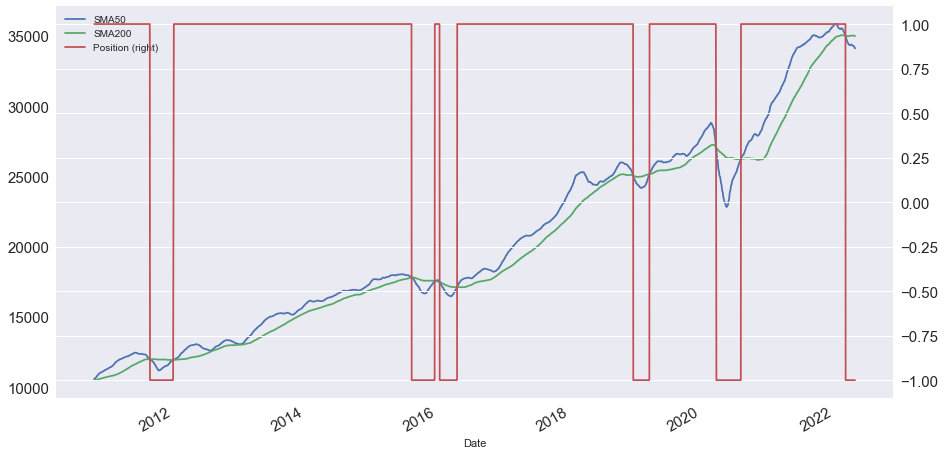

In [58]:
df[["SMA50", "SMA200", "Position"]].plot(figsize = (15, 8), secondary_y = "Position", fontsize = 15)
plt.show()

In [59]:
df["Strategy_Ret"] = df["Position"].shift() * df["DJI_Return"]

In [60]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0, 0]

In [61]:
df.head()

,DJI_Close,DJI_Return,SMA50,SMA200,Position,Strategy_Ret,Strategy
Date,,,,,,,
2010-10-19,10978.620117,-0.014813,10582.089805,10507.098203,1.0,NaN,10978.620117
2010-10-20,11107.969727,0.011782,10591.364199,10509.777954,1.0,0.011782,11107.969727
2010-10-21,11146.570312,0.003475,10606.719004,10512.642407,1.0,0.003475,11146.570312
2010-10-22,11132.559570,-0.001257,10622.971191,10515.270903,1.0,-0.001257,11132.559570
2010-10-25,11164.049805,0.002829,10640.189180,10518.000200,1.0,0.002829,11164.049805


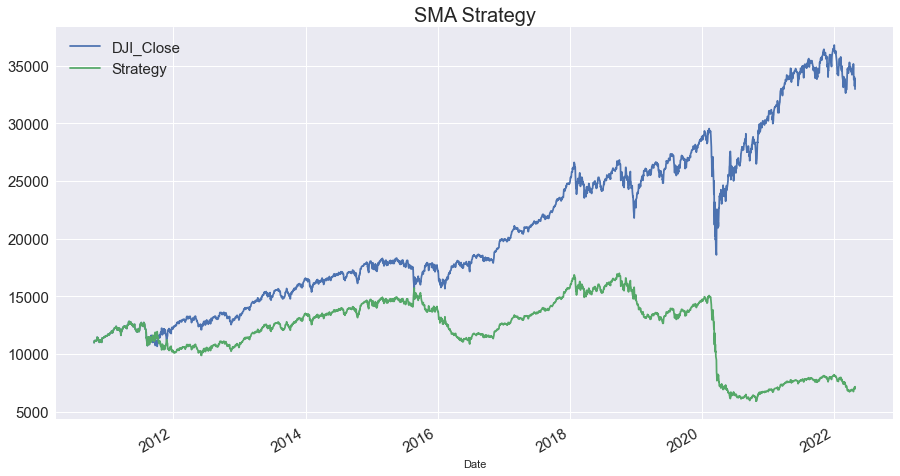

In [63]:
df[["DJI_Close", "Strategy"]].plot(figsize = (15, 8), fontsize = 15)
plt.legend(fontsize = 15)
plt.title("SMA Strategy", fontsize = 20)
plt.show()

In [64]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return,Risk
DJI_Return,0.108811,0.170540
Strategy_Ret,-0.022427,0.170646


It is evident that the SMA momentum strategy clearly underperforms. 

## Backtesting the Perfect Strategy, in case we can predict the future (for fun)

Here we will implement a strategy where we will short in case of negative returns and vice-versa.

In [66]:
df = data.loc["2010":, "Close"].to_frame()
df["DJI_Return"] = df.Close.pct_change()
df.columns = ["DJI_Close", "DJI_Return"]
df.dropna(inplace = True)

In [67]:
df["Position"] = np.sign(df["DJI_Return"])

In [68]:
df["Strategy_Ret"] = df["Position"] * df["DJI_Return"]

In [69]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0, 0]

In [70]:
df.head()

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,-1.0,0.001128,10583.946490
2010-01-06,10573.679688,0.000157,1.0,0.000157,10585.608519
2010-01-07,10606.860352,0.003138,1.0,0.003138,10618.826617
2010-01-08,10618.190430,0.001068,1.0,0.001068,10630.169477
2010-01-11,10663.990234,0.004313,1.0,0.004313,10676.020951


We will take y-axis in log scale below:

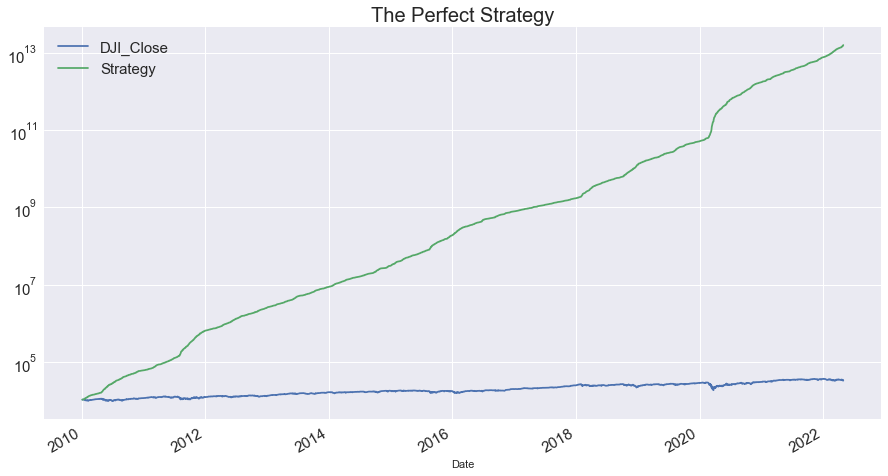

In [71]:
df[["DJI_Close", "Strategy"]].plot(figsize = (15, 8), fontsize = 15, logy = True)
plt.legend(fontsize = 15)
plt.title("The Perfect Strategy", fontsize = 20)
plt.show()

In [72]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]])

,Return,Risk
DJI_Return,0.106961,0.170593
Strategy_Ret,1.730114,0.131398
